# CUSTOMER SEGMENTATION FOR ONLINE RETAIL

The task is to analyze customer data from an online retail platform to segment customers based on their purchasing behavior, preferences, and demographics. The goal is to gain insights into distinct customer segments and tailor marketing strategies to target each segment effectively.

In [1]:
# Import necessary libraries for numerical operations, data manipulation, visualization, and warnings handling
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
# Load the dataset
data = pd.read_excel(r"C:\Users\lavan\Downloads\Treue Technologies\Customer Segmentation for Online Retail\Online Retail.xlsx")

In [3]:
# Display a random sample of 10 rows from the dataset
data.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
213717,555553,22244,3 HOOK HANGER MAGIC GARDEN,12,2011-06-05 13:45:00,1.95,12662.0,Germany
391687,570675,22839,3 TIER CAKE TIN GREEN AND CREAM,2,2011-10-11 15:03:00,14.95,13690.0,United Kingdom
49195,540506,84050,PINK HEART SHAPE EGG FRYING PAN,2,2011-01-09 11:12:00,1.65,17796.0,United Kingdom
130854,547513,22907,PACK OF 20 NAPKINS PANTRY DESIGN,12,2011-03-23 13:59:00,0.85,17519.0,United Kingdom
425946,573340,22609,PENS ASSORTED SPACEBALL,36,2011-10-30 11:55:00,0.19,14159.0,United Kingdom
471646,576645,21845,DAIRY MAID STRIPE MUG,36,2011-11-16 10:14:00,0.79,16245.0,United Kingdom
177102,552040,21070,VINTAGE BILLBOARD MUG,12,2011-05-06 08:19:00,1.25,12502.0,Spain
532456,580983,22979,PANTRY WASHING UP BRUSH,1,2011-12-06 16:26:00,3.29,NaN,United Kingdom
383212,570007,20975,12 PENCILS SMALL TUBE RED RETROSPOT,24,2011-10-07 09:26:00,0.65,12519.0,Germany
331237,566001,21640,ASSORTED TUTTI FRUTTI FOB NOTEBOOK,3,2011-09-08 11:53:00,0.85,13700.0,United Kingdom


In [4]:
# Print the shape of the dataset (number of rows and columns)
data.shape

(541909, 8)

In [5]:
# Display information about the columns and their data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
data.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
df_null_percent = round(100*(data.isna().sum())/len(data), 2)
df_null_percent

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [9]:
data.dropna(inplace=True)
data.shape

(406829, 8)

In [10]:
data.isna().sum().sum()

0

In [11]:
data.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [12]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [13]:
data['CustomerID'] = data['CustomerID'].astype(str)

In [14]:
data.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country                object
dtype: object

In [15]:
data.CustomerID.nunique()

4372

# Analysing the Customers based on 3 factors:
    
1. R(Recency): Number of days since last purchase
2. F(Frequency): Number of transactions
3. M(Monetary): Total Number of transactions(revenue contributed)

In [16]:
# Monetary
data['amount'] = data['Quantity']*data['UnitPrice']

In [17]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [18]:
rfm_m = data.groupby('CustomerID')['amount'].sum()
rfm_m = pd.DataFrame(rfm_m)
rfm_m.reset_index(inplace=True)
rfm_m

,CustomerID,amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4367,18280.0,180.60
4368,18281.0,80.82
4369,18282.0,176.60
4370,18283.0,2094.88


In [19]:
# Frequency
rfm_f = data.groupby('CustomerID')['InvoiceDate'].count()
rfm_f = pd.DataFrame(rfm_f)
rfm_f.reset_index(inplace=True)
rfm_f

,CustomerID,InvoiceDate
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4367,18280.0,10
4368,18281.0,7
4369,18282.0,13
4370,18283.0,756


In [20]:
rfm_f.columns

Index(['CustomerID', 'InvoiceDate'], dtype='object')

In [21]:
rfm_f.columns = ['CustomerID', 'frequency']
rfm_f.head()

,CustomerID,frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [22]:
# Merging rfm_m and rfm_f dataframes

rfm = pd.merge(rfm_m, rfm_f, on='CustomerID')
rfm.head()

,CustomerID,amount,frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [23]:
rfm.shape

(4372, 3)

In [24]:
# Recency
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], format= '%m/%d/%Y %H:%M')

In [25]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [26]:
data.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country                object
amount                float64
dtype: object

In [27]:
# Finding last transaction date
max_date = max(data['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [28]:
data['diff'] = max_date-data['InvoiceDate']
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount,diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [29]:
rfm_p = data.groupby('CustomerID')['diff'].min()
rfm_p = rfm_p.reset_index()
rfm_p.head()

,CustomerID,diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [30]:
rfm_p['diff'] = rfm_p['diff'].dt.days
rfm_p.head()

,CustomerID,diff
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [31]:
# Merging rfm_m, rfm_f and rfm_p dataframes to get final RFM dataframe

rfm = pd.merge(rfm, rfm_p, on='CustomerID', how='inner')
rfm.tail()

,CustomerID,amount,frequency,diff
4367,18280.0,180.60,10,277
4368,18281.0,80.82,7,180
4369,18282.0,176.60,13,7
4370,18283.0,2094.88,756,3
4371,18287.0,1837.28,70,42


In [32]:
rfm.columns = ['CustomerID', 'Amount', 'Frequency', 'Recency']
rfm.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


In [33]:
rfm.describe()

,Amount,Frequency,Recency
count,4372.000000,4372.000000,4372.000000
mean,1898.459701,93.053294,91.047118
std,8219.345141,232.471608,100.765435
min,-4287.630000,1.000000,0.000000
25%,293.362500,17.000000,16.000000
50%,648.075000,42.000000,49.000000
75%,1611.725000,102.000000,142.000000
max,279489.020000,7983.000000,373.000000


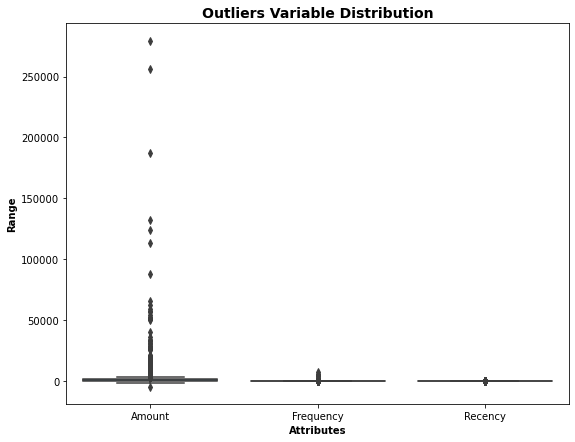

In [34]:
attributes = ['Amount', 'Frequency', 'Recency']
plt.figure(figsize=(9,7))

sns.boxplot(data = rfm[attributes])

plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.show()

In [35]:
# Removing (statistical) outliers for Amount
Q1 = rfm.Amount.quantile(0.25)
Q3 = rfm.Amount.quantile(0.75)
IQR = Q3 - Q1
rfm = rfm[(rfm.Amount >= Q1 - 1.5*IQR) & (rfm.Amount <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Recency
Q1 = rfm.Recency.quantile(0.25)
Q3 = rfm.Recency.quantile(0.75)
IQR = Q3 - Q1
rfm = rfm[(rfm.Recency >= Q1 - 1.5*IQR) & (rfm.Recency <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Frequency
Q1 = rfm.Frequency.quantile(0.25)
Q3 = rfm.Frequency.quantile(0.75)
IQR = Q3 - Q1
rfm = rfm[(rfm.Frequency >= Q1 - 1.5*IQR) & (rfm.Frequency <= Q3 + 1.5*IQR)]

In [36]:
rfm

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309
5,12352.0,1545.41,95,35
...,...,...,...,...
4366,18278.0,173.90,9,73
4367,18280.0,180.60,10,277
4368,18281.0,80.82,7,180
4369,18282.0,176.60,13,7


In [37]:
rfm.describe()

,Amount,Frequency,Recency
count,3629.000000,3629.000000,3629.000000
mean,787.019433,47.736567,97.162855
std,745.191104,42.505471,96.901974
min,-1592.490000,1.000000,0.000000
25%,257.230000,15.000000,21.000000
50%,530.150000,33.000000,58.000000
75%,1065.350000,69.000000,156.000000
max,3563.850000,181.000000,362.000000


In [38]:
# Rescaling the attributes
rfm_df = rfm[['Amount', 'Frequency', 'Recency']]
scaler = StandardScaler()
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled

array([[-1.05627655, -1.07616428,  2.35153665],
       [ 1.35583983, -0.39380514, -0.23906682],
       [ 1.30257099,  0.59443913, -0.81705007],
       ...,
       [-0.94780621, -0.95851616,  0.85497289],
       [-0.81925771, -0.8173384 , -0.93058249],
       [ 1.40957842,  0.52385025, -0.56934296]])

In [39]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Amount', 'Frequency', 'Recency']
rfm_df_scaled.head()

,Amount,Frequency,Recency
0,-1.056277,-1.076164,2.351537
1,1.355840,-0.393805,-0.239067
2,1.302571,0.594439,-0.817050
3,-0.607471,-0.723220,2.186399
4,1.017853,1.112091,-0.641591


In [40]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(rfm_df_scaled)

KMeans(n_clusters=4)

In [41]:
kmeans.labels_

array([2, 3, 3, ..., 2, 0, 3])

In [42]:
# Using the Elbow method to find the right number of clusters

wcss = []
n_clusters = [2,3,4,5,6,7,8,9]
for n in n_clusters:
    kmeans = KMeans(n_clusters = n)
    kmeans.fit(rfm_df_scaled)
    wcss.append(kmeans.inertia_)
wcss

[6112.921835859565,
 3708.119491371173,
 2922.9612317325896,
 2486.0819411719376,
 2186.061882742724,
 1940.2813338680935,
 1760.5690450109896,
 1591.423193180226]

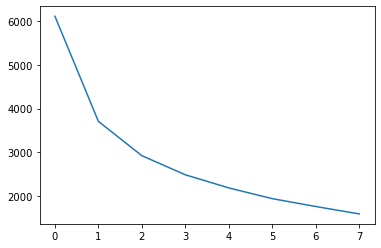

In [43]:
plt.plot(wcss)

In [44]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(rfm_df_scaled)

KMeans(n_clusters=3)

In [45]:
kmeans.labels_

array([2, 1, 0, ..., 2, 1, 0])

In [46]:
rfm['ClusterID'] = kmeans.labels_
rfm.head()

,CustomerID,Amount,Frequency,Recency,ClusterID
0,12346.0,0.00,2,325,2
2,12348.0,1797.24,31,74,1
3,12349.0,1757.55,73,18,0
4,12350.0,334.40,17,309,2
5,12352.0,1545.41,95,35,0


<AxesSubplot:xlabel='ClusterID', ylabel='Amount'>

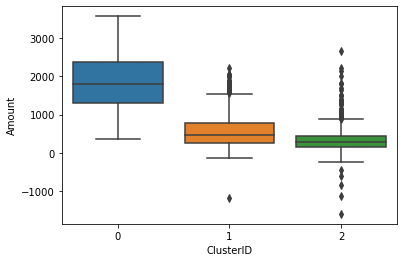

In [47]:
sns.boxplot(x='ClusterID', y='Amount', data=rfm)

<AxesSubplot:xlabel='ClusterID', ylabel='Frequency'>

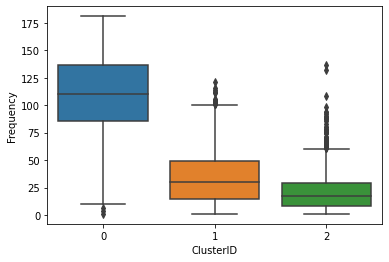

In [48]:
sns.boxplot(x='ClusterID', y='Frequency', data=rfm)

<AxesSubplot:xlabel='ClusterID', ylabel='Recency'>

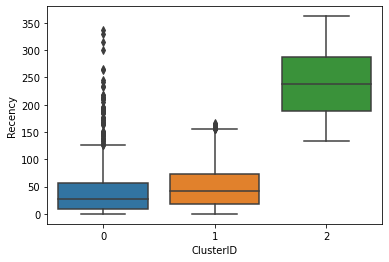

In [49]:
sns.boxplot(x='ClusterID', y='Recency', data=rfm)

In [50]:
rfm[rfm['ClusterID']==2]

,CustomerID,Amount,Frequency,Recency,ClusterID
0,12346.0,0.00,2,325,2
4,12350.0,334.40,17,309,2
6,12353.0,89.00,4,203,2
7,12354.0,1079.40,58,231,2
8,12355.0,459.40,13,213,2
...,...,...,...,...,...
4355,18262.0,149.48,13,139,2
4358,18268.0,0.00,2,133,2
4359,18269.0,138.90,8,357,2
4367,18280.0,180.60,10,277,2


# K-Means Clustering with 3 Cluster Ids

1. Customers with Cluster Id 2 are the customers with high amount of transactions as compared to other customers.
2. Customers with Cluster Id 2 are frequent buyers.
3. Customers with Cluster Id 0 are not recent buyers and hence least of importance from business point of view.